In [1]:
import pandas as pd
import numpy as np

/opt/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt

In [3]:
ali_df = pd.read_csv("ali_final_data.csv", index_col=None)
ali_df.head()

,date,money
0,2013/2/1,229.95
1,2013/3/1,877.88
2,2013/4/1,612.89
3,2013/5/1,273.60
4,2013/6/1,1325.43


In [4]:
money_array = np.array(ali_df.money)

In [5]:
money_array

array([  229.95,   877.88,   612.89,   273.6 ,  1325.43,   386.45,
        1393.11,  3307.92, 12085.86,    62.38,  3669.06,  1002.35,
        5350.75, 10061.62,  5506.74,   966.07,  1736.69,  1446.23,
       10504.75,  6721.09,  2163.5 ,  4158.76,  2338.09,   145.93,
         762.82, 15999.01,   574.28,   557.22,   472.9 ,  1451.86,
         256.3 ,  3016.35,   528.53,   598.16, 12934.28,  1647.39,
         318.47,  1412.68,  1399.34,   653.1 , 13471.51,   846.85,
         698.37,  2324.46,   440.57,  1036.2 ,  3889.25,  7039.1 ,
        1914.21,  2320.33,  3593.62,  3147.53,  7927.2 ,  1011.51,
        1137.48,  4646.75,   848.27,  1986.98,  3363.12,  3003.89,
        4268.32,  6309.82,  3436.05,  1037.57,  8613.97,  8235.98,
       41468.81, 21515.68,   163.01])

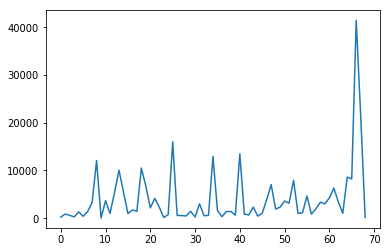

In [6]:
plt.plot(money_array)
plt.show()

In [7]:
# normalize data
normalize_data = (money_array - np.mean(money_array)) / np.std(money_array)
normalize_data

array([-0.61584562, -0.51105476, -0.55391206, -0.60878603, -0.4386717 ,
       -0.5905346 , -0.4277257 , -0.11804009,  1.30163165, -0.64294701,
       -0.05963228, -0.490924  ,  0.21235041,  0.97424774,  0.23757895,
       -0.49679163, -0.3721579 , -0.41913451,  1.04591594,  0.43397792,
       -0.30312916,  0.01956776, -0.27489241, -0.62943432, -0.52966361,
        1.93451231, -0.56015652, -0.56291566, -0.57655289, -0.41822396,
       -0.61158399, -0.16519623, -0.56755575, -0.55629437,  1.43884812,
       -0.38660054, -0.60152912, -0.42456061, -0.42671811, -0.54740882,
        1.52573527, -0.51607329, -0.54008723, -0.27709682, -0.58178168,
       -0.48544938, -0.02402057,  0.48541024, -0.34344727, -0.27776477,
       -0.07183333, -0.14398025,  0.62904422, -0.48944254, -0.46906919,
        0.09849125, -0.51584363, -0.33167805, -0.1091125 , -0.1672114 ,
        0.03728709,  0.3674625 , -0.0973174 , -0.48522781,  0.74011675,
        0.67898376,  6.05378807,  2.8267331 , -0.62667194])

In [9]:
normalize_data = normalize_data[:, np.newaxis]
normalize_data.shape

(69, 1)

In [10]:
time_step = 12
rnn_unit = 10
input_size = 1
output_size = 1

In [11]:
train_x, train_y = [], []
for i in range(len(normalize_data) - time_step -1):
    x = normalize_data[i : i+time_step]
    y = normalize_data[i+1 : i+1+time_step]
    train_x.append(x.tolist())
    train_y.append(y.tolist())

In [12]:
print(len(train_x))
print(train_x[0])

56
[[-0.6158456201512597], [-0.5110547565193039], [-0.5539120573910523], [-0.6087860285325124], [-0.43867170430921665], [-0.5905345986544913], [-0.4277256983354065], [-0.11804009404002705], [1.3016316506075274], [-0.6429470123059782], [-0.059632283795024506], [-0.4909240035116186]]


In [13]:
print(len(train_y))
print(train_y[0])

56
[[-0.5110547565193039], [-0.5539120573910523], [-0.6087860285325124], [-0.43867170430921665], [-0.5905345986544913], [-0.4277256983354065], [-0.11804009404002705], [1.3016316506075274], [-0.6429470123059782], [-0.059632283795024506], [-0.4909240035116186], [0.21235041103500915]]


In [62]:
import tensorflow as tf

In [71]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, time_step, input_size], name="x")
y = tf.placeholder(tf.float32, shape=[None, time_step, output_size], name="y")

In [72]:
weights = {
    "in": tf.Variable(tf.random_normal([input_size, rnn_unit])),
    "out": tf.Variable(tf.random_normal([rnn_unit, 1]))
}

biases = {
    "in": tf.Variable(tf.constant(0.1, shape=[rnn_unit, ])),
    "out": tf.Variable(tf.constant(0.1, shape=[1, ]))
}

In [73]:
def lstm_model():
    w_in = weights["in"]
    b_in = biases["in"]
    temp_input = tf.reshape(x, [-1, input_size])
    input_rnn = tf.matmul(temp_input, w_in) + b_in
    input_rnn = tf.reshape(input_rnn, [-1, time_step, rnn_unit])
    
    cell=tf.nn.rnn_cell.BasicLSTMCell(rnn_unit)
    
    # init_state=cell.zero_state(batch, dtype=tf.float32)
    
    output_rnn, final_states = tf.nn.dynamic_rnn(cell, inputs=input_rnn, dtype=tf.float32)
    
    output = tf.reshape(output_rnn, [-1, rnn_unit])
    w_out = weights["out"]
    b_out = biases["out"]
    pred = tf.matmul(output, w_out) + b_out
    return pred, final_states

In [74]:
# 定义训练前的learning rate、batch_size

lr = 0.0001
# batch_size = tf.placeholder(tf.float32, shape=[1], name="batch_size")

train_x = np.array(train_x)
train_y = np.array(train_y)


pred, _ = lstm_model()
#损失函数
loss=tf.reduce_mean(tf.square(tf.reshape(pred, [-1]) - tf.reshape(y, [-1])))
train_op=tf.train.AdamOptimizer(lr).minimize(loss)
saver=tf.train.Saver(tf.global_variables())
save_dir = "save_models/"

In [75]:
init_op = tf.global_variables_initializer()

In [77]:
with tf.Session() as sess:
    sess.run(init_op)
    
    total_step = 0
    for epoch in range(10000):
        shuffle_index = np.random.permutation(train_x.shape[0])
        train_x_shuffle = train_x[shuffle_index]
        train_y_shuffle = train_y[shuffle_index]
            
        num_batch_per_epoch = (len(train_x)-1) // batch_size + 1            
                
        for num_batch in range(num_batch_per_epoch):
            start_index = num_batch * batch_size
            end_index = min(start_index+batch_size, len(train_x))
            
            x_batch = train_x_shuffle[start_index: end_index, :, :]
            y_batch = train_y_shuffle[start_index: end_index, :, :]
            
            _, loss_=sess.run([train_op, loss], feed_dict={x:x_batch, y:y_batch})
                
            if total_step%200 == 0:
                print("\nepoch: {}, step: {}, loss: {}".format(epoch, total_step, loss_))    
            total_step += 1
    
    print("保存模型：",saver.save(sess, save_dir+"{}_model".format(total_step)))


epoch: 0, step: 0, loss: 1.0594996213912964

epoch: 66, step: 200, loss: 0.6229938864707947

epoch: 133, step: 400, loss: 0.5996109843254089

epoch: 200, step: 600, loss: 0.4193289875984192

epoch: 266, step: 800, loss: 0.5638923048973083

epoch: 333, step: 1000, loss: 0.3234291672706604

epoch: 400, step: 1200, loss: 0.36959192156791687

epoch: 466, step: 1400, loss: 0.28844892978668213

epoch: 533, step: 1600, loss: 0.6091911196708679

epoch: 600, step: 1800, loss: 0.3366261124610901

epoch: 666, step: 2000, loss: 0.3349684178829193

epoch: 733, step: 2200, loss: 0.33303844928741455

epoch: 800, step: 2400, loss: 0.30010488629341125

epoch: 866, step: 2600, loss: 0.2790236473083496

epoch: 933, step: 2800, loss: 0.4211655557155609

epoch: 1000, step: 3000, loss: 0.45498862862586975

epoch: 1066, step: 3200, loss: 0.3091519773006439

epoch: 1133, step: 3400, loss: 0.5136644840240479

epoch: 1200, step: 3600, loss: 0.3093486726284027

epoch: 1266, step: 3800, loss: 0.5346955060958862
